In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

In [84]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')

<AxesSubplot:>

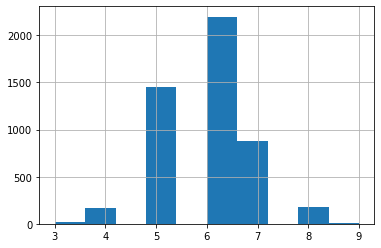

In [85]:
df['quality'].hist()

In [86]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:>

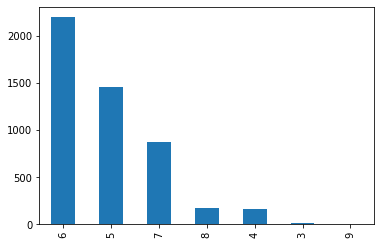

In [87]:
df['quality'].value_counts().plot(kind='bar')

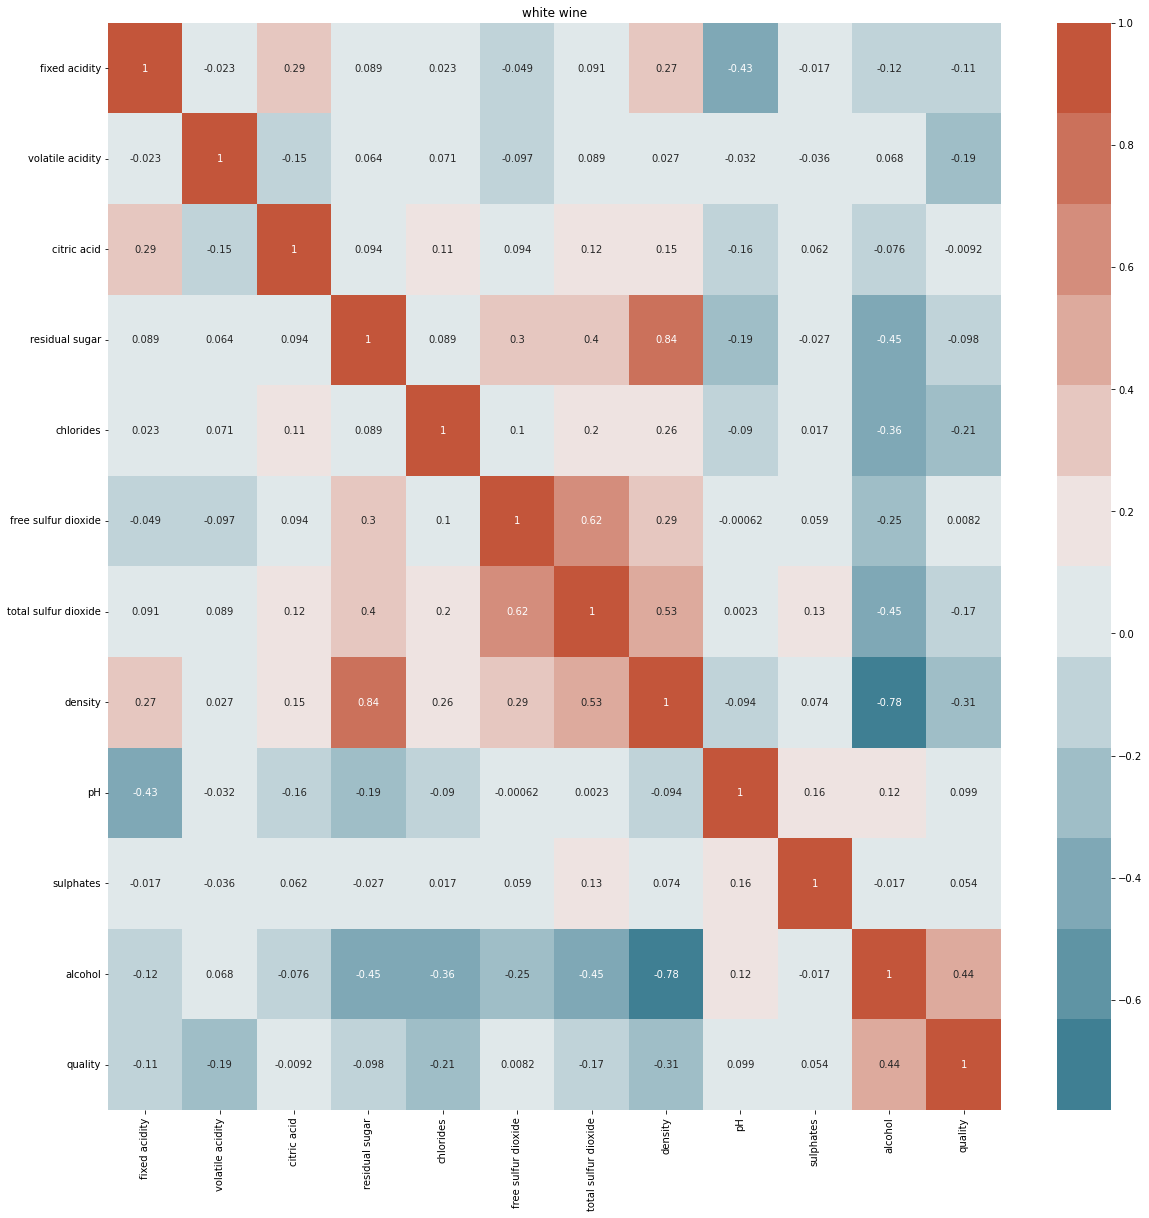

In [88]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220,20,n=12), annot = True)
plt.title('white wine')
plt.show()

In [89]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

features.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [90]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

In [91]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [92]:
#import gridsearch from the sklearn library 
from sklearn.model_selection import GridSearchCV

def best_parameter(param_grid, estimator):
    #fit on the dataset on all parameter combinations in param_grid 
    #retain the best conbination 
    grid_search = GridSearchCV(estimator, param_grid, cv = 5)
    #Train model while tuning the parameters using grid search 
    grid_result = grid_search.fit(x_train, y_train)
    #display the best parameter c value 
    print(grid_result.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    return grid_search

In [93]:
def validation(estimator):
    #train model 
    estimator.fit(x_train, y_train)

    #predict the target for the test dataset 
    test_predict = estimator.predict(x_test)

    print(estimator.__class__)
    
    #compute the model accuracy on the development set: How often is the classifier correct?
    print("Accuracy (test):{}".format(metrics.accuracy_score(y_test, test_predict)))

    #print confusion matrix
    print(confusion_matrix(y_test, test_predict))

    #print precision, recall and f1 
    print(classification_report(y_test, test_predict))

In [94]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

best_parameter(param_grid, KNeighborsClassifier())

{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.6470101258894363
KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [95]:
validation(KNeighborsClassifier(n_neighbors=11, p=1, weights='distance'))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy (test):0.6877551020408164
[[  0   0   2   3   0   0]
 [  0   7   9   7   2   0]
 [  0   5 203  74   9   0]
 [  0   0  72 323  36   1]
 [  0   0   8  57 126   1]
 [  0   0   1   7  12  15]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.58      0.28      0.38        25
           5       0.69      0.70      0.69       291
           6       0.69      0.75      0.72       432
           7       0.68      0.66      0.67       192
           8       0.88      0.43      0.58        35

    accuracy                           0.69       980
   macro avg       0.59      0.47      0.51       980
weighted avg       0.69      0.69      0.68       980



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [37]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')

cut_bins = [1, 4, 6, 9]
df['quality'] = pd.cut(df['quality'], bins = cut_bins, labels = [0, 1, 2])
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

<AxesSubplot:>

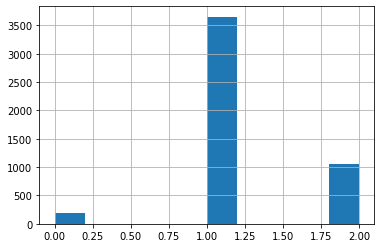

In [62]:
df['quality'].hist()

In [63]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use s

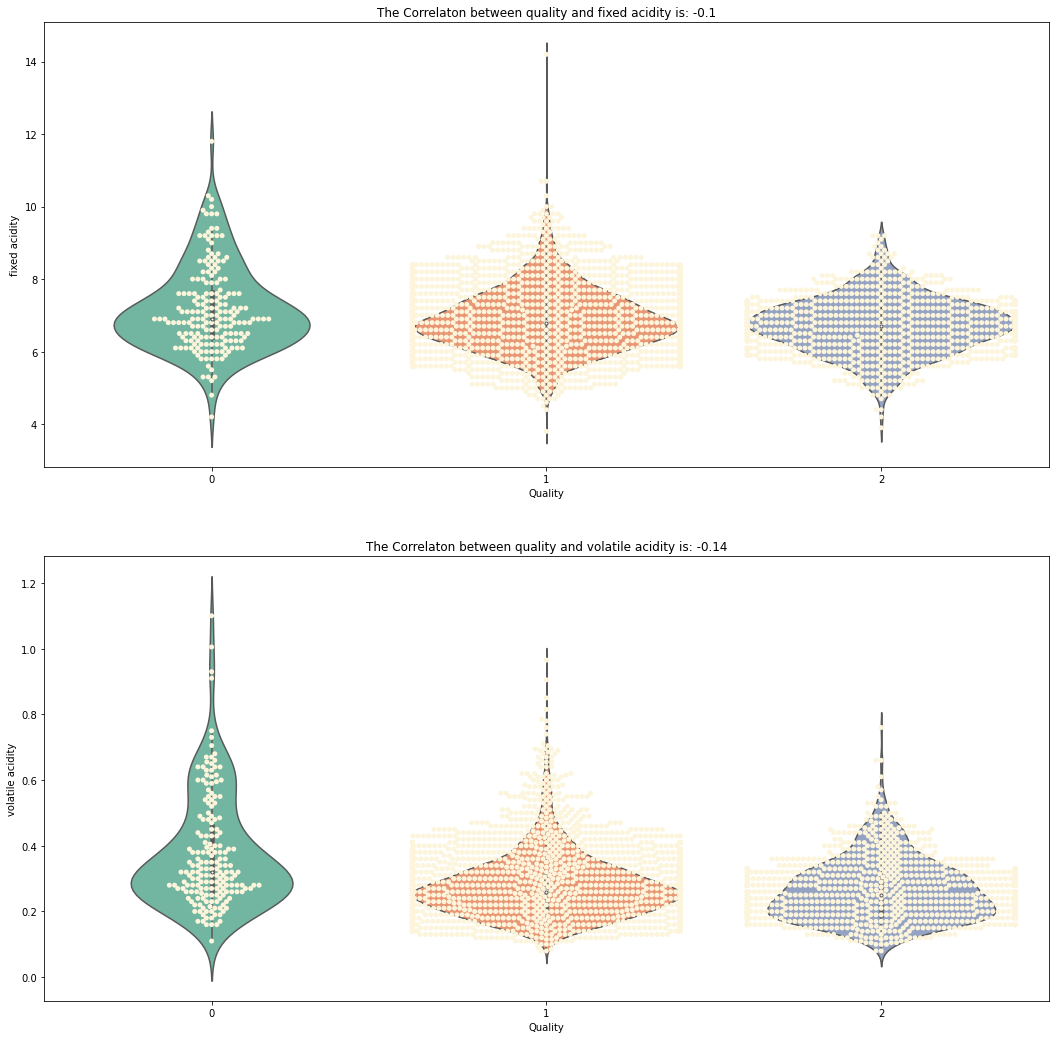

In [56]:

fig,ax = plt.subplots(2,1, figsize= (18, 18))
wine = sns.swarmplot(x= "quality", y= "fixed acidity",data= df, color= "#FCF5DB", ax=ax[0])
wine = sns.violinplot(x= "quality", y= "fixed acidity",data= df, palette="Set2", ax=ax[0])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and fixed acidity is: " +
        str(df["fixed acidity"].corr(df["quality"]).round(2)))

wine = sns.swarmplot(x= "quality", y= "volatile acidity",data= df, color= "#FCF5DB", ax=ax[1])
wine = sns.violinplot(x= "quality", y= "volatile acidity",data= df, palette="Set2", ax=ax[1])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and volatile acidity is: " +
        str(df["volatile acidity"].corr(df["quality"]).round(2)))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

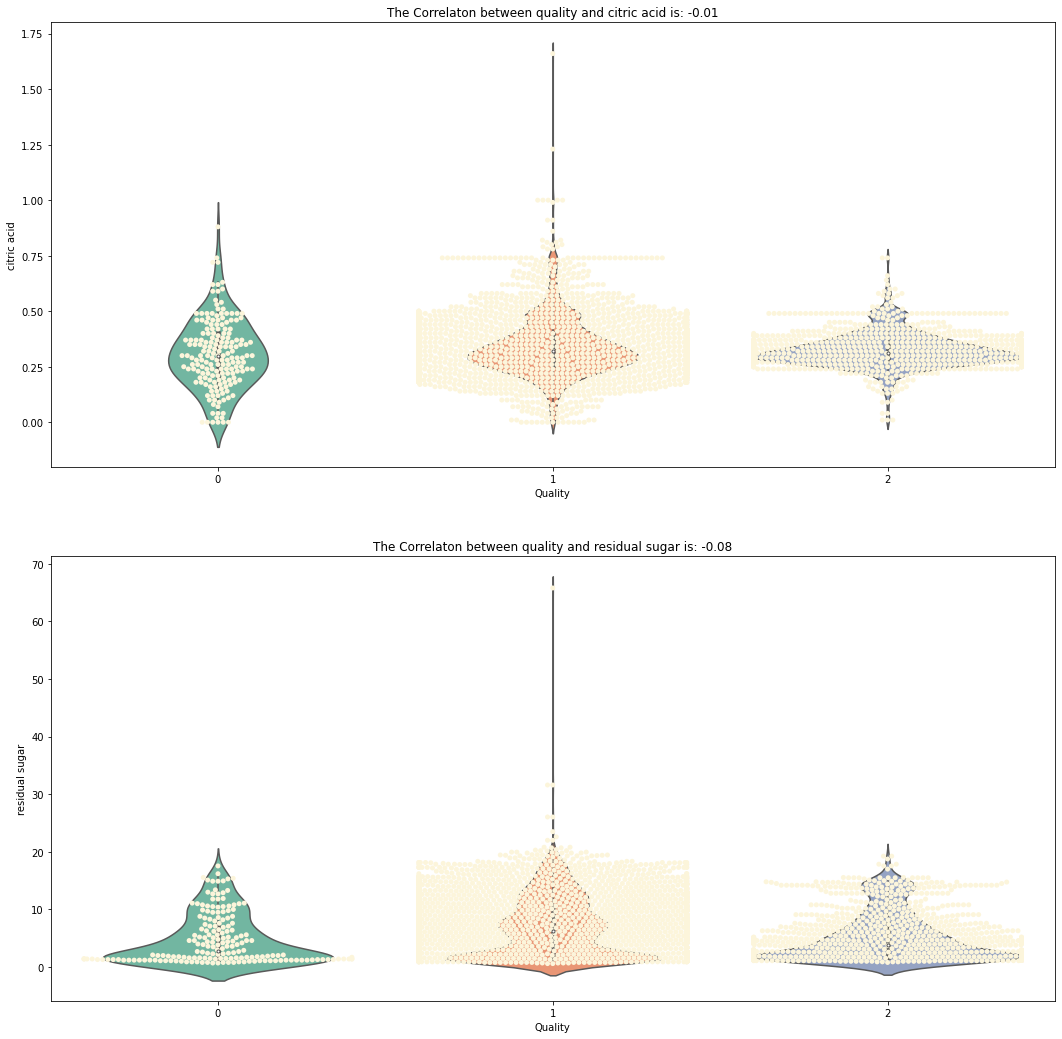

In [57]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
wine = sns.swarmplot(x= "quality", y= "citric acid",data= df, color= "#FCF5DB", ax=ax[0])
wine = sns.violinplot(x= "quality", y= "citric acid",data= df, palette="Set2", ax=ax[0])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and citric acid is: " +
        str(df["citric acid"].corr(df["quality"]).round(2)))


wine = sns.swarmplot(x= "quality", y= "residual sugar",data= df, color= "#FCF5DB", ax=ax[1])
wine = sns.violinplot(x= "quality", y= "residual sugar",data= df, palette="Set2", ax=ax[1])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and residual sugar is: " +
        str(df["residual sugar"].corr(df["quality"]).round(2)))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

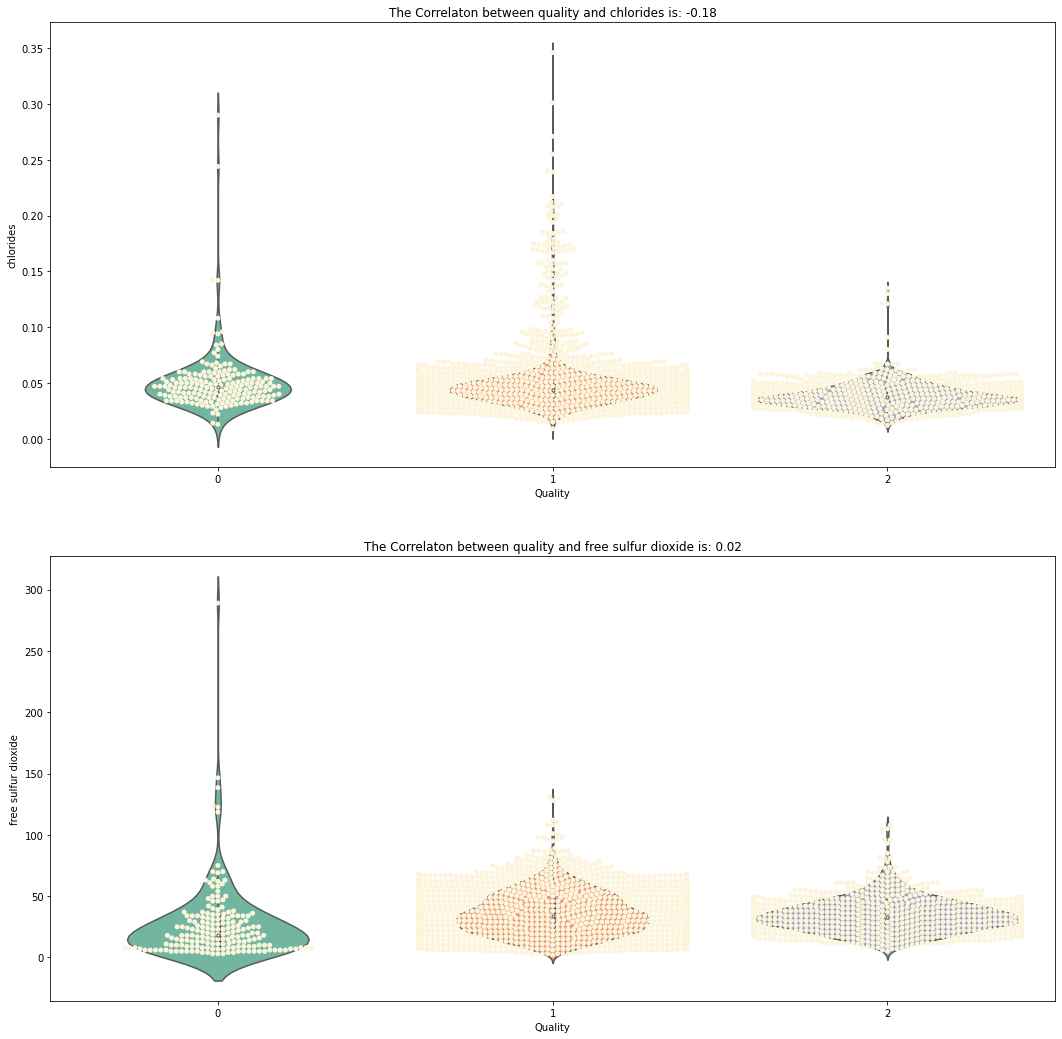

In [58]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
wine = sns.swarmplot(x= "quality", y= "chlorides",data= df, color= "#FCF5DB", ax=ax[0])
wine = sns.violinplot(x= "quality", y= "chlorides",data= df, palette="Set2", ax=ax[0])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and chlorides is: " +
        str(df["chlorides"].corr(df["quality"]).round(2)))

wine = sns.swarmplot(x= "quality", y= "free sulfur dioxide",data= df, color= "#FCF5DB", ax=ax[1])
wine = sns.violinplot(x= "quality", y= "free sulfur dioxide",data= df, palette="Set2", ax=ax[1])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and free sulfur dioxide is: " +
        str(df["free sulfur dioxide"].corr(df["quality"]).round(2)))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

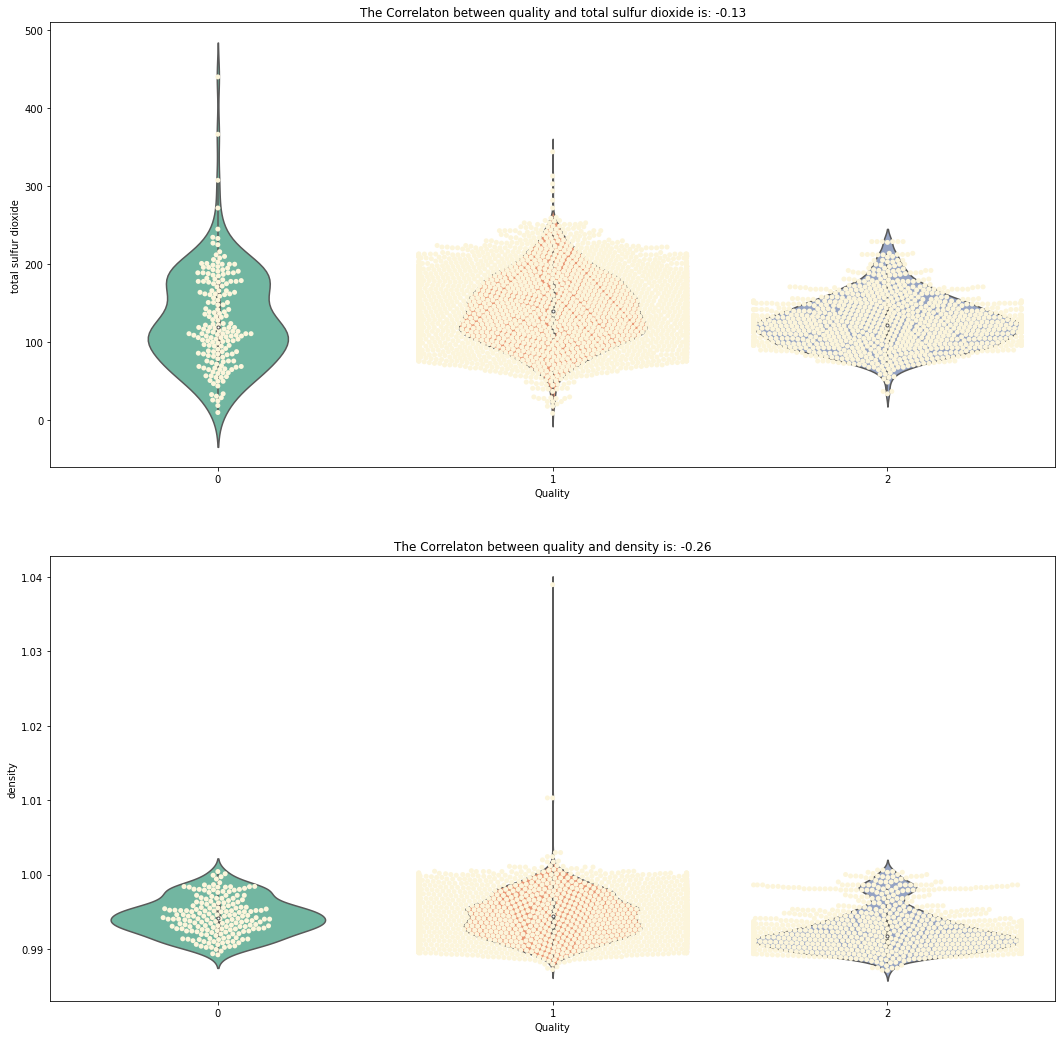

In [59]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
wine = sns.swarmplot(x= "quality", y= "total sulfur dioxide",data= df, color= "#FCF5DB", ax=ax[0])
wine = sns.violinplot(x= "quality", y= "total sulfur dioxide",data= df, palette="Set2", ax=ax[0])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and total sulfur dioxide is: " +
        str(df["total sulfur dioxide"].corr(df["quality"]).round(2)))

wine = sns.swarmplot(x= "quality", y= "density",data= df, color= "#FCF5DB", ax=ax[1])
wine = sns.violinplot(x= "quality", y= "density",data= df, palette="Set2", ax=ax[1])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and density is: " +
        str(df["density"].corr(df["quality"]).round(2)))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

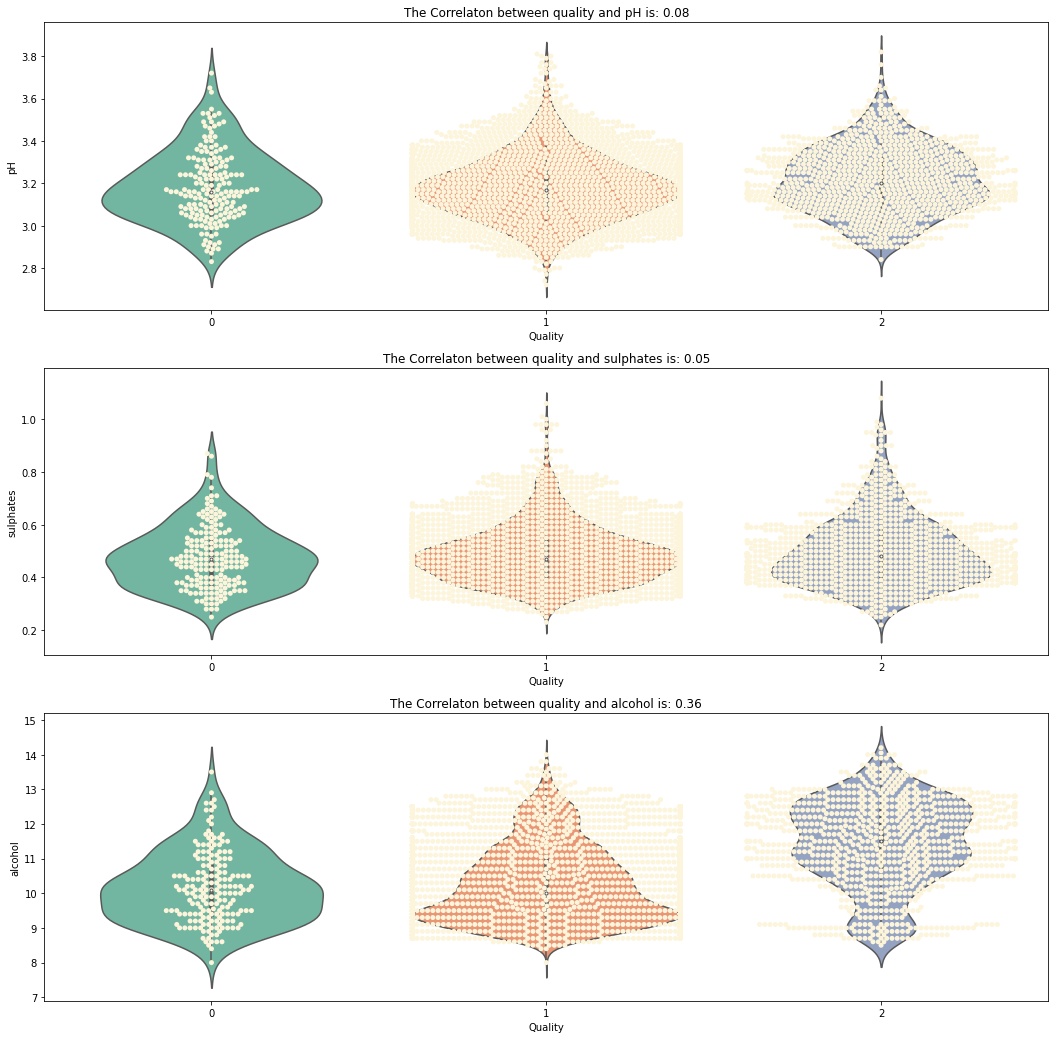

In [60]:
fig,ax = plt.subplots(3,1, figsize= (18, 18))
wine = sns.swarmplot(x= "quality", y= "pH",data= df, color= "#FCF5DB", ax=ax[0])
wine = sns.violinplot(x= "quality", y= "pH",data= df, palette="Set2", ax=ax[0])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and pH is: " +
        str(df["pH"].corr(df["quality"]).round(2)))

wine = sns.swarmplot(x= "quality", y= "sulphates",data= df, color= "#FCF5DB", ax=ax[1])
wine = sns.violinplot(x= "quality", y= "sulphates",data= df, palette="Set2", ax=ax[1])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and sulphates is: " +
        str(df["sulphates"].corr(df["quality"]).round(2)))
        
wine = sns.swarmplot(x= "quality", y= "alcohol",data= df, color= "#FCF5DB", ax=ax[2])
wine = sns.violinplot(x= "quality", y= "alcohol",data= df, palette="Set2", ax=ax[2])
wine.set_xlabel("Quality")
wine.set_title("The Correlaton between quality and alcohol is: " +
        str(df["alcohol"].corr(df["quality"]).round(2)))
plt.show()

In [20]:
#Save the data with target and scaled features 
df.to_csv(r'winequality-preprocess.csv', index = False, header = True)

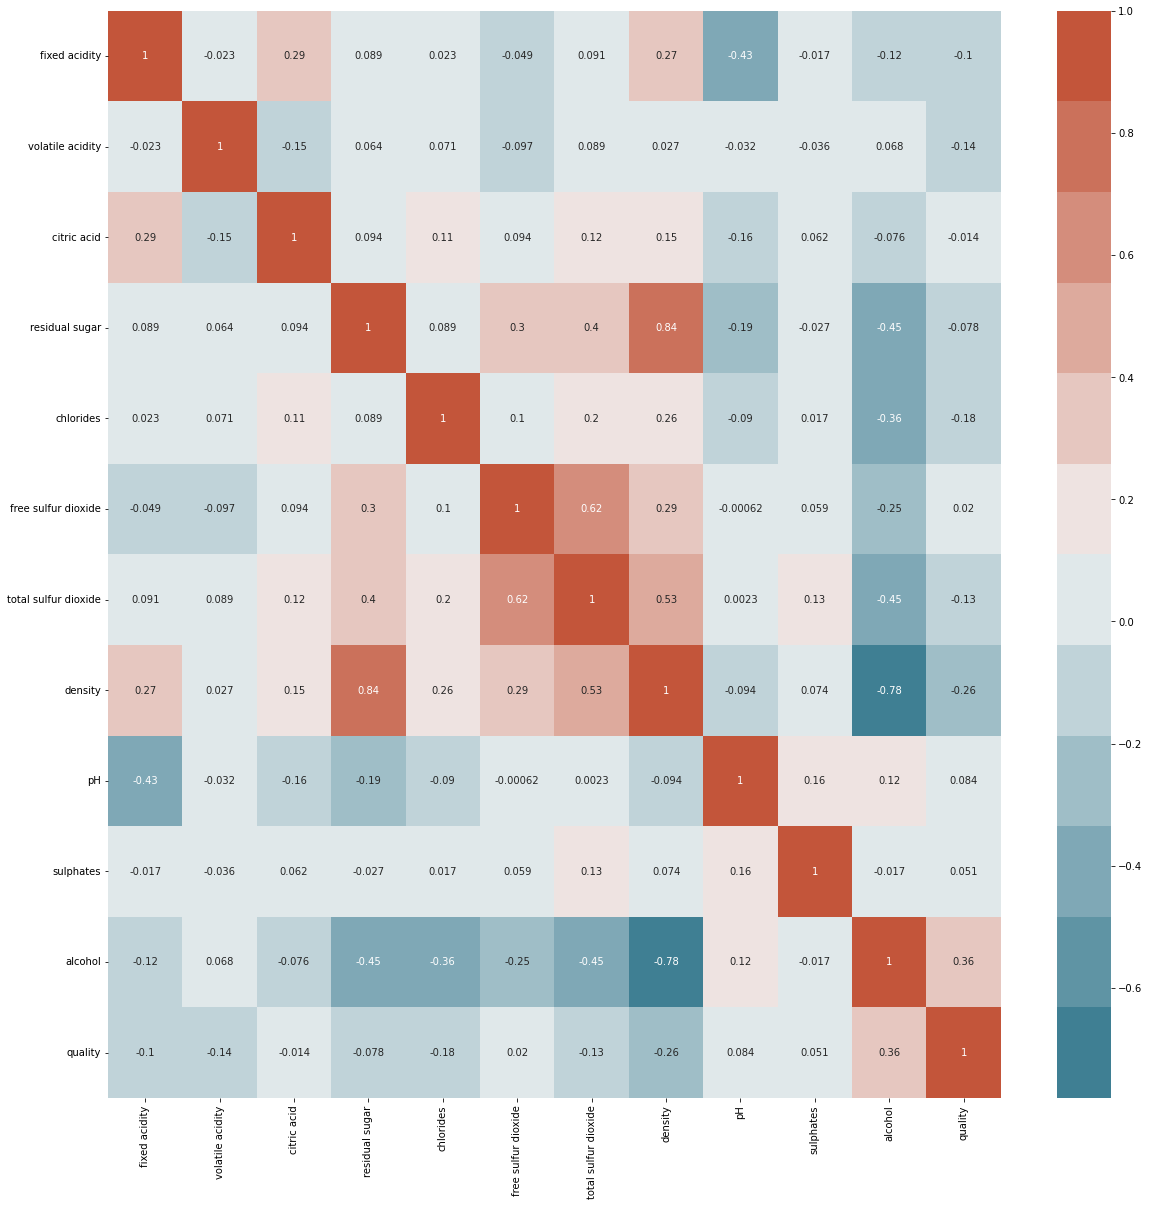

In [69]:
df = pd.read_csv('winequality-preprocess.csv')
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220,20,n=12), annot = True)
plt.show()

In [74]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

features.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [75]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

In [76]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [44]:
#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

cv = best_parameter(param_grid, KNeighborsClassifier())


{'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.8256747334949305
KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')


In [25]:
validation(KNeighborsClassifier(n_neighbors=11, p=1, weights='distance'))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy (test):0.8551020408163266
[[  5  24   1]
 [  1 679  43]
 [  0  73 154]]
              precision    recall  f1-score   support

           0       0.83      0.17      0.28        30
           1       0.88      0.94      0.91       723
           2       0.78      0.68      0.72       227

    accuracy                           0.86       980
   macro avg       0.83      0.59      0.64       980
weighted avg       0.85      0.86      0.84       980



In [27]:
#import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
#the param_grid specifies one grid should be explored 
param_grid = {"criterion":["gini", "entropy"], 
              "splitter" : ["best", "random"], 
              "max_depth":[5, 6, 7, 8, 9]}

best_parameter(param_grid, DecisionTreeClassifier())

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}
0.7761575703078167
DecisionTreeClassifier(criterion='entropy', max_depth=7)


In [28]:
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=7)
validation(estimator)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy (test):0.7806122448979592
[[  7  23   0]
 [  7 650  66]
 [  0 119 108]]
              precision    recall  f1-score   support

           0       0.50      0.23      0.32        30
           1       0.82      0.90      0.86       723
           2       0.62      0.48      0.54       227

    accuracy                           0.78       980
   macro avg       0.65      0.54      0.57       980
weighted avg       0.76      0.78      0.77       980



In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.9, random_state = 42)

In [30]:
x_train.shape

(489, 11)

In [31]:
from sklearn.svm import SVC

#the param_grid specifies one grid should be explored 
param_grid = {"C":[1, 10, 100, 1000]}

#fit on the dataset on all parameter combinations in param_grid 
#retain the best conbination 
best_parameter(param_grid, SVC(kernel = 'linear'))

{'C': 100}
0.7954555017883442
SVC(C=100, kernel='linear')


In [32]:
best_parameter({"C":[1, 10, 100, 1000], 'degree':[1,2,3,4,5]}, SVC(kernel = 'poly'))

{'C': 1000, 'degree': 1}
0.7954555017883442
SVC(C=1000, degree=1, kernel='poly')


In [33]:
best_parameter({"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto']}, 
               SVC(kernel = 'rbf'))

{'C': 1, 'gamma': 'auto'}
0.7996002524721229
SVC(C=1, gamma='auto')


In [34]:
best_parameter({"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto'], 
               "coef0":[0,1,10]},
               SVC(kernel = 'sigmoid'))

{'C': 1, 'coef0': 0, 'gamma': 'scale'}
0.7689459288870187
SVC(C=1, coef0=0, kernel='sigmoid')


In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [36]:
validation(SVC(C=1, gamma='auto', kernel = 'rbf'))

<class 'sklearn.svm._classes.SVC'>
Accuracy (test):0.7938775510204081
[[  1  29   0]
 [  0 698  25]
 [  0 148  79]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.80      0.97      0.87       723
           2       0.76      0.35      0.48       227

    accuracy                           0.79       980
   macro avg       0.85      0.45      0.47       980
weighted avg       0.80      0.79      0.76       980

